# Assignment # 2

## Question 1. Track an Altcoin [15 points]

The purpose of assignment 2 is to compare one Altcoin with Bitcoin. Please go to https://www.coingecko.com/en to find an Altcoin that you like most. Download the historical price of this coin until March 31, 2020. Please download the longest sample period possible. But you do not need to collect the data before January 1, 2014. Save the data as an excel or csv file. Your TA Wanyi provides a video tutorial on how to download data from this website. I break down the questions into 5 small parts so that you can easily tackle them one by one.

### Load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Downloading the csv file from GitHub account

url = "https://raw.githubusercontent.com/LilianYou/FinTech/master/ltc-usd-max.csv" # Make sure the url is the raw version of the file on GitHub

lite_price = pd.read_csv(url)

lite_price.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,4.29983,73773387.0,0.0
1,2013-04-29 00:00:00 UTC,4.35940,74936909.0,0.0
2,2013-04-30 00:00:00 UTC,4.18295,72037636.0,0.0
3,2013-05-01 00:00:00 UTC,3.64914,62957992.0,0.0
4,2013-05-02 00:00:00 UTC,3.38879,58565340.0,0.0


In [4]:
# get rid of data before 2014.1.1 and after 2020.3.31
indexdate_early = lite_price['snapped_at'].str.startswith('2013')
indexdelete_early = indexdate_early[indexdate_early == True].index

indexdate_late = lite_price['snapped_at'].str.startswith('2020-04')
indexdelete_late = indexdate_late[indexdate_late == True].index

indexdelete = indexdelete_early.union(indexdelete_late)
lite_price.drop(indexdelete, inplace = True)

lite_price

,snapped_at,price,market_cap,total_volume
247,2014-01-01 00:00:00 UTC,24.591300,6.017772e+08,8.159590e+06
248,2014-01-02 00:00:00 UTC,25.523400,6.253065e+08,1.779050e+07
249,2014-01-03 00:00:00 UTC,24.144000,5.922219e+08,2.540190e+07
250,2014-01-04 00:00:00 UTC,25.229800,6.196475e+08,1.229160e+07
251,2014-01-05 00:00:00 UTC,26.483100,6.512523e+08,2.339030e+07
...,...,...,...,...
2523,2020-03-27 00:00:00 UTC,40.377280,2.599127e+09,2.649874e+09
2524,2020-03-28 00:00:00 UTC,38.098484,2.452714e+09,2.126938e+09
2525,2020-03-29 00:00:00 UTC,38.911490,2.505340e+09,2.973415e+09
2526,2020-03-30 00:00:00 UTC,37.348943,2.405019e+09,2.140131e+09


In [5]:
lite_price.tail()

,snapped_at,price,market_cap,total_volume
2523,2020-03-27 00:00:00 UTC,40.377280,2.599127e+09,2.649874e+09
2524,2020-03-28 00:00:00 UTC,38.098484,2.452714e+09,2.126938e+09
2525,2020-03-29 00:00:00 UTC,38.911490,2.505340e+09,2.973415e+09
2526,2020-03-30 00:00:00 UTC,37.348943,2.405019e+09,2.140131e+09
2527,2020-03-31 00:00:00 UTC,38.996682,2.512152e+09,2.809026e+09


### a) give a brief description of the Altcoin you choose, e.g., the release date, motivation of this coin, issue price and its current price as of March 31, 2020. Why do you choose this digital coin? (This question is open ended and there is no correct answer) [2 points]

#### haven't answered yet

### b) use the data of the altcoin you download, calculate its daily returns over the sample period you have. Plot its returns over time. Do you find the return of this coin is very volatile? (Note that you do not need to submit the daily return data, only report the figure) [2 points]

In [6]:
lite_price['snapped_at'] = pd.to_datetime(lite_price['snapped_at'])
lite_price = lite_price.set_index('snapped_at')
lite_price.head()

,price,market_cap,total_volume
snapped_at,,,
2014-01-01 00:00:00+00:00,24.5913,601777194.0,8159590.0
2014-01-02 00:00:00+00:00,25.5234,625306506.0,17790500.0
2014-01-03 00:00:00+00:00,24.1440,592221947.0,25401900.0
2014-01-04 00:00:00+00:00,25.2298,619647471.0,12291600.0
2014-01-05 00:00:00+00:00,26.4831,651252321.0,23390300.0


In [7]:
lite_daily_return = lite_price['price'].pct_change()*100

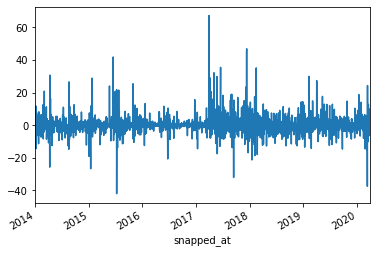

In [8]:
lite_daily_return.plot()

#### From the figure, we could tell that the return of the litecoin is very volatile in the past 6 years.

### c) report the highest and lowest returns of this coin during the sample period. Do you find any convincing explanations for these big positive/negative returns days? (Note that you can search around news and information about these big gain/loss days. It is OK if you don’t find consistent explanations. Just briefly summarize what you find) [3 points]

In [93]:
lite_daily_return.max() # 67.26023948025062

67.26023948025062

In [94]:
lite_daily_return.idxmax(axis = 1) # 2017-03-30
#lite_daily_return[ lite_daily_return == price ].index # checking code

Timestamp('2017-03-30 00:00:00+0000', tz='UTC')

#### During the sample period, the highest litecoin daily return is around $67.26 on March 30th, 2017. Possible explantion: SegWit happened.

In [95]:
lite_daily_return.min() # -42.14403214048795

-42.14403214048795

In [96]:
lite_daily_return.idxmin(axis = 1) # 2015-07-10
#lite_daily_return[ lite_daily_return == price ].index # checking code

Timestamp('2015-07-10 00:00:00+0000', tz='UTC')

#### During the sample period, the lowest litecoin daily return is around -$42.14 on July 10th, 2015. Possible explanation: supply change

### d) use the Bitcoin price data I provided for HW#1, get the daily returns of Bitcoin during the same sample period (you should have it from HW#1 already). For example, if the coin you collect is from January 1, 2016, then you only need to calculate the daily stock returns from 2016 to March 31, 2020. Now, plot the returns of this coin and Bitcoin in the same figure and report the figure. Is this coin’s return more volatile than Bitcoin return? Calculate and report the correlation between the Bitcoin return and the return of the Altcoin you choose. [4 points]

In [18]:
# read bitcoin file
url_bit = "https://raw.githubusercontent.com/LilianYou/FinTech/master/bitcoin_price.csv" # Make sure the url is the raw version of the file on GitHub

bit_price = pd.read_csv(url_bit)

bit_price

,Date,Closing Price (USD)
0,1/1/14,769.098490
1,1/2/14,804.027190
2,1/3/14,813.317480
3,1/4/14,871.115830
4,1/5/14,970.650830
...,...,...
2267,3/27/20,6682.780049
2268,3/28/20,6229.488343
2269,3/29/20,5922.489835
2270,3/30/20,6483.739446


In [13]:
# get rid of data before 2014.1.1 and after 2020.3.31
indexdate_early2 = bit_price['Date'].str.endswith('13')
indexdelete_early2 = indexdate_early2[indexdate_early2 == True].index

#indexdate_late2 = bit_price['Date'].str.endswith('4/20')
#indexdelete_late2 = indexdate_late2[indexdate_late2 == True].index

indexdelete2 = indexdelete_early2.union(indexdelete_late2)
bit_price.drop(indexdelete2, inplace = True)

bit_price

,Date,Closing Price (USD)
0,1/1/14,769.098490
1,1/2/14,804.027190
2,1/3/14,813.317480
3,1/4/14,871.115830
4,1/5/14,970.650830
...,...,...
2267,3/27/20,6682.780049
2268,3/28/20,6229.488343
2269,3/29/20,5922.489835
2270,3/30/20,6483.739446


In [106]:
bit_price.tail()

,Date,Closing Price (USD)
2267,3/27/20,6682.780049
2268,3/28/20,6229.488343
2269,3/29/20,5922.489835
2270,3/30/20,6483.739446
2271,3/31/20,6446.421347


In [19]:
bit_price['Date'] = pd.to_datetime(bit_price['Date'])
bit_price = bit_price.set_index('Date')
bit_price.head()

,Closing Price (USD)
Date,
2014-01-01,769.09849
2014-01-02,804.02719
2014-01-03,813.31748
2014-01-04,871.11583
2014-01-05,970.65083


In [20]:
bit_daily_return = bit_price.pct_change()*100

In [21]:
lite_daily_return.index = lite_daily_return.index.date
lite_daily_return.head()

2014-01-01         NaN
2014-01-02    3.790365
2014-01-03   -5.404452
2014-01-04    4.497184
2014-01-05    4.967538
Name: price, dtype: float64

In [22]:
merged = pd.merge(lite_daily_return, bit_daily_return, left_index=True, right_index=True)
merged.columns = ['lite_daily_return', 'bit_daily_return']

In [23]:
merged.head()

,lite_daily_return,bit_daily_return
2014-01-01,NaN,NaN
2014-01-02,3.790365,4.541512
2014-01-03,-5.404452,1.155470
2014-01-04,4.497184,7.106493
2014-01-05,4.967538,11.426150


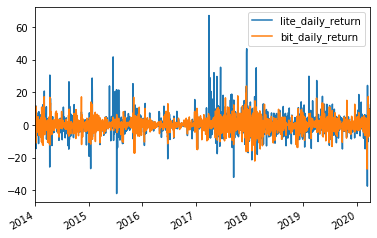

In [24]:
merged.plot()

#### From the figure, we could tell that litecoin's return is more volatile than bitcoin's return.

In [25]:
merged.corr()

,lite_daily_return,bit_daily_return
lite_daily_return,1.000000,0.270396
bit_daily_return,0.270396,1.000000


#### The correlation between the daily return of litecoin and bitcoin is around 0.279, which is only a low to medium correlation.

### e) calculate and report summary statistics (mean, median, standard deviation) of the daily returns of Bitcoin and the Altcoin you choose during the same sample period. Is the standard deviation of this Altcoin higher or lower than the standard deviation of Bitcoin returns? Is this consistent with your conclusion from part d)? [4 points]

In [124]:
merged.describe()

,lite_daily_return,bit_daily_return
count,2261.000000,2261.000000
mean,0.170983,0.179825
std,5.899031,4.037996
min,-42.144032,-27.090062
25%,-2.156771,-1.350348
50%,-0.114277,0.101479
75%,1.821881,1.813896
max,67.260239,23.925200


#### The standard deviation of litecoin (around 5.899 USD) is higher than the standard deviation of bitcoin (around 4.038USD). This is consistent with my conclusion from part d) that litecoin is more volatile than bitcoin.